### Scatterplots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
url = 'https://fbref.com/en/comps/Big5/Big-5-European-Leagues-Stats'

df = pd.read_html(url, attrs = {'id': 'big5_table'})[0]

In [4]:
df.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Leverkusen,de GER,1,29,25,4,0,74,19,...,79,2.72,61.8,24.3,37.5,1.29,W W W W W,29965,"Florian Wirtz, Victor Boniface - 11",Lukáš Hrádecký
1,2,Inter,it ITA,1,32,26,5,1,77,17,...,83,2.59,68.2,24.5,43.6,1.36,W D W W D,42849,Lautaro Martínez - 23,Yann Sommer
2,3,Real Madrid,es ESP,1,31,24,6,1,67,20,...,78,2.52,57.7,27.6,30.1,0.97,D W W W W,71731,Jude Bellingham - 16,Andriy Lunin
3,4,Manchester City,eng ENG,1,32,22,7,3,76,32,...,73,2.28,67.1,30.6,36.5,1.14,D D W W W,49855,Erling Haaland - 20,Ederson
4,5,Barcelona,es ESP,2,31,21,7,3,62,34,...,70,2.26,65.1,30.9,34.2,1.10,D W W W W,40954,Robert Lewandowski - 13,Marc-André ter Stegen


### Plot of xG & Goals Scored

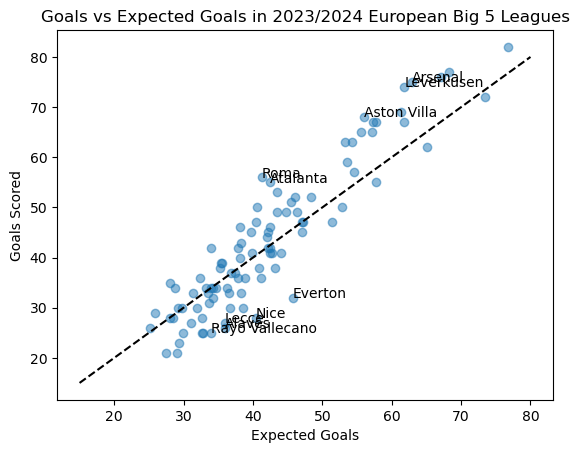

In [9]:
# Scatter Plot

fig, ax = plt.subplots()

ax.scatter(df['xG'],df['GF'], alpha =.5)

ax.set_xlabel('Expected Goals')
ax.set_ylabel('Goals Scored')
ax.set_title('Goals vs Expected Goals in 2023/2024 European Big 5 Leagues')

# Line
ax.plot([15,80],[15,80], color='black', linestyle = '--')


# Indicating Over/Under Performers
df['difference'] = df['GF'] - df['xG']

overperformers = df.nlargest(5,'difference')
underperformers = df.nsmallest(5,'difference')

for i in range(5):
    ax.text(overperformers.iloc[i]['xG'], overperformers.iloc[i]['GF'], overperformers.iloc[i]['Squad'])
    ax.text(underperformers.iloc[i]['xG'], underperformers.iloc[i]['GF'], underperformers.iloc[i]['Squad'])
